# Midterm Part B Minh Nguyen #2069407

## Question 1

In [7]:
import cv2
from matplotlib import pyplot as plt

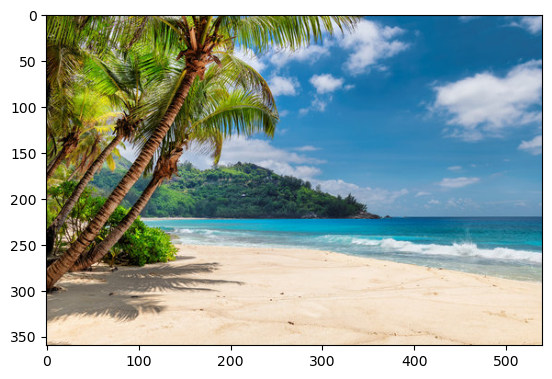

In [8]:
# Load image
img = cv2.imread("beach.jpg")

# Convert from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(img_rgb)

In [9]:
# Split the image into 3 channels
red, green, blue = cv2.split(img_rgb)

Text(0.5, 1.0, 'Red Channel Histogram')

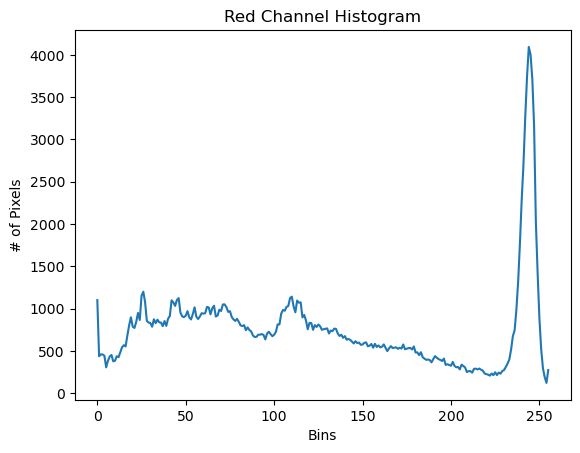

In [10]:
# Calculate the histogram of the red channel
red_hist = cv2.calcHist([red], [0], None, [256], [0, 256])
plt.plot(red_hist)
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.title('Red Channel Histogram')

Text(0.5, 1.0, 'Green Channel Histogram')

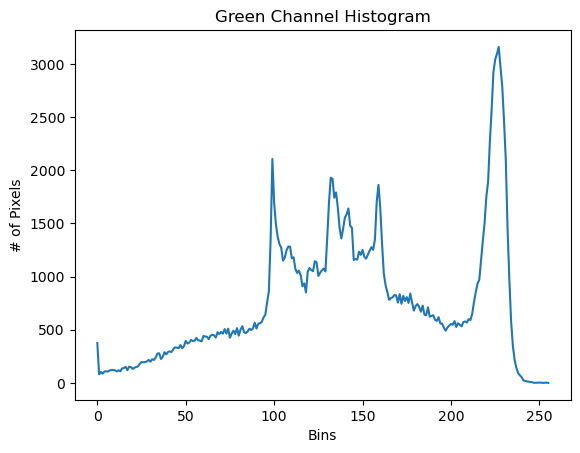

In [11]:
# Calculate the histogram of the green channel
green_hist = cv2.calcHist([green], [0], None, [256], [0, 256])
plt.plot(green_hist)
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.title('Green Channel Histogram')

Text(0.5, 1.0, 'Blue Channel Histogram')

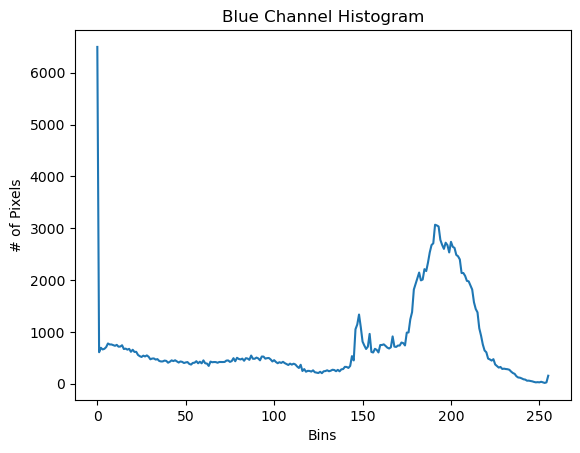

In [12]:
# Calculate the histogram of the blue channel
blue_hist = cv2.calcHist([blue], [0], None, [256], [0, 256])
plt.plot(blue_hist)
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.title('Blue Channel Histogram')

# Question 2

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# Define dataset paths
train_dir = "train"
test_dir = "test"

# Define parameters
IMG_SIZE = (256, 256)
BATCH_SIZE = 32

# Load training and validation data
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    subset="training",
    seed=42
)

val_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    subset="validation",
    seed=42
)

# Load test dataset
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 360 files belonging to 2 classes.
Using 324 files for training.
Found 360 files belonging to 2 classes.
Using 36 files for validation.
Found 40 files belonging to 2 classes.


In [15]:
# Apply ResNet50 preprocessing
train_data = train_data.map(lambda x, y: (preprocess_input(x), y))
val_data = val_data.map(lambda x, y: (preprocess_input(x), y))
test_data = test_data.map(lambda x, y: (preprocess_input(x), y))

In [16]:
# Load ResNet50 as the base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze base model initially

# Add a custom layer to perform binary classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Freeze all layers except of the classifier layer (custom)
base_model.layers[-1].trainable = True

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
# Train the model
history = model.fit(train_data, 
                    batch_size=BATCH_SIZE, 
                    validation_data=val_data,
                    epochs=10)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5092 - loss: 0.8389 - val_accuracy: 0.6944 - val_loss: 0.6091
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6938 - loss: 0.5894 - val_accuracy: 0.9167 - val_loss: 0.3750
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8175 - loss: 0.4250 - val_accuracy: 0.9722 - val_loss: 0.2715
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8316 - loss: 0.3824 - val_accuracy: 0.9722 - val_loss: 0.2208
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 979ms/step - accuracy: 0.9198 - loss: 0.2751 - val_accuracy: 0.9722 - val_loss: 0.1792
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 982ms/step - accuracy: 0.9163 - loss: 0.2411 - val_accuracy: 0.9722 - val_loss: 0.1581
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8929 - loss: 0.2420 - val_accuracy: 0.9722 - val_loss: 0.1542
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9528 - loss: 0.1973 - val_accuracy: 0.9722 - val

In [18]:
# Report the accuracy
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.9187 - loss: 0.1583
Test Accuracy: 0.9250
Test Loss: 0.1505


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 967ms/step


2025-03-06 11:06:06.682104: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


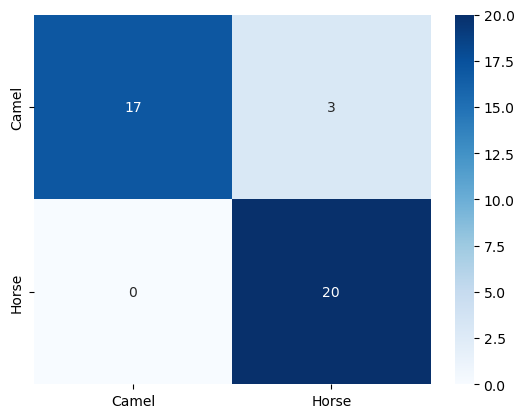

In [19]:
# Generate confusion matrix
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).flatten()
y_true = np.concatenate([y for x, y in test_data], axis=0)
confusion_mtx = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap='Blues', xticklabels=['Camel', 'Horse'], yticklabels=['Camel', 'Horse'])
plt.show()

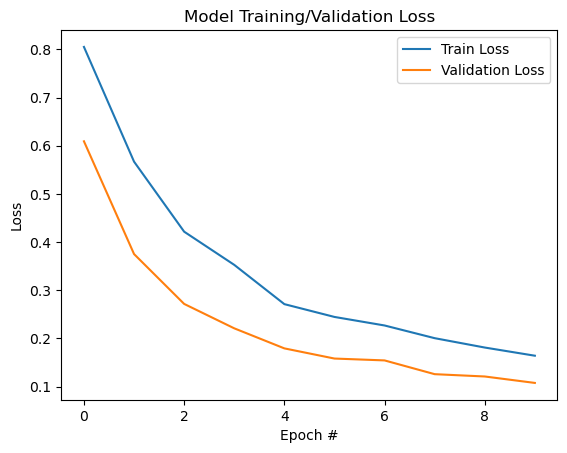

In [20]:
# Plot a training learning curve (loss-epochs)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training/Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')

- From the plot, we can observe that the model appears to be relatively well-trained. The training and validation loss are both decreasing, and the validation loss curve closely follows the training loss curve. This suggests that the model is not overfitting the training data, and is generalizing well to the validation data.